## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [80]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [81]:
train, test = keras.datasets.cifar10.load_data()

In [82]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [83]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [84]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [85]:
"""Code Here
設定超參數
"""
## 超參數設定
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.05,0.25,0.5,0.75,0.95]

In [87]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈，建立不同  momentum 的模型並訓練
"""
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.05
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 12ms/step - l

196/196 [==============================] - 2s 11ms/step - loss: 0.7497 - accuracy: 0.7329 - val_loss: 1.6322 - val_accuracy: 0.5030
Experiment with LR = 0.100000, Momentum = 0.25
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____

196/196 [==============================] - 2s 10ms/step - loss: 0.7199 - accuracy: 0.7448 - val_loss: 1.6500 - val_accuracy: 0.5136
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7009 - accuracy: 0.7509 - val_loss: 1.9377 - val_accuracy: 0.4675
Experiment with LR = 0.100000, Momentum = 0.50
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
ou

196/196 [==============================] - 2s 11ms/step - loss: 0.7181 - accuracy: 0.7409 - val_loss: 2.0044 - val_accuracy: 0.4756
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 0.6748 - accuracy: 0.7579 - val_loss: 1.8511 - val_accuracy: 0.4884
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6554 - accuracy: 0.7640 - val_loss: 1.9318 - val_accuracy: 0.4607
Experiment with LR = 0.100000, Momentum = 0.75
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

196/196 [==============================] - 2s 11ms/step - loss: 0.8420 - accuracy: 0.6946 - val_loss: 1.9515 - val_accuracy: 0.4473
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8504 - accuracy: 0.6950 - val_loss: 1.8796 - val_accuracy: 0.4675
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8321 - accuracy: 0.6999 - val_loss: 1.7720 - val_accuracy: 0.4808
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8263 - accuracy: 0.7010 - val_loss: 1.8928 - val_accuracy: 0.4733
Experiment with LR = 0.100000, Momentum = 0.95
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________________________________________

196/196 [==============================] - 2s 10ms/step - loss: 1.4623 - accuracy: 0.4808 - val_loss: 1.7435 - val_accuracy: 0.4178
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4526 - accuracy: 0.4869 - val_loss: 1.6496 - val_accuracy: 0.4453
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4513 - accuracy: 0.4892 - val_loss: 1.8057 - val_accuracy: 0.4052
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4811 - accuracy: 0.4777 - val_loss: 1.7153 - val_accuracy: 0.4176
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4821 - accuracy: 0.4790 - val_loss: 1.6551 - val_accuracy: 0.4451
Experiment with LR = 0.010000, Momentum = 0.05
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
________________________________

196/196 [==============================] - 2s 10ms/step - loss: 1.2419 - accuracy: 0.5647 - val_loss: 1.4085 - val_accuracy: 0.4950
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2307 - accuracy: 0.5679 - val_loss: 1.3640 - val_accuracy: 0.5146
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2412 - accuracy: 0.5652 - val_loss: 1.6080 - val_accuracy: 0.4303
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2232 - accuracy: 0.5699 - val_loss: 1.4665 - val_accuracy: 0.4786
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2212 - accuracy: 0.5707 - val_loss: 1.4890 - val_accuracy: 0.4643
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2157 - accuracy: 0.5709 - val_loss: 1.4053 - val_accuracy: 0.4980
Experiment with LR = 0.010000, Momentum = 0.25
Model: "model"
_________________________________________________________________
Layer (type)        

196/196 [==============================] - 2s 10ms/step - loss: 1.2170 - accuracy: 0.5754 - val_loss: 1.3690 - val_accuracy: 0.5129
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2101 - accuracy: 0.5773 - val_loss: 1.4613 - val_accuracy: 0.4773
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1910 - accuracy: 0.5810 - val_loss: 1.4137 - val_accuracy: 0.5011
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1740 - accuracy: 0.5879 - val_loss: 1.3454 - val_accuracy: 0.5236
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.1820 - accuracy: 0.5864 - val_loss: 1.4291 - val_accuracy: 0.4961
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1957 - accuracy: 0.5808 - val_loss: 1.4180 - val_accuracy: 0.5077
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1635 - accuracy: 0.5927 - val_loss: 1.5985 - val_accuracy: 0.4654
Expe

196/196 [==============================] - 2s 10ms/step - loss: 1.1196 - accuracy: 0.6065 - val_loss: 1.4006 - val_accuracy: 0.5072
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1003 - accuracy: 0.6160 - val_loss: 1.4900 - val_accuracy: 0.4814
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0843 - accuracy: 0.6215 - val_loss: 1.6007 - val_accuracy: 0.4778
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0899 - accuracy: 0.6196 - val_loss: 1.7023 - val_accuracy: 0.4082
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0874 - accuracy: 0.6174 - val_loss: 1.4499 - val_accuracy: 0.4862
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0653 - accuracy: 0.6271 - val_loss: 1.4160 - val_accuracy: 0.5084
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0480 - accuracy: 0.6319 - val_loss: 1.5567 - val_accuracy: 0.4685
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.8783 - accuracy: 0.6915 - val_loss: 1.3983 - val_accuracy: 0.5348
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8513 - accuracy: 0.7000 - val_loss: 1.4248 - val_accuracy: 0.5247
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8332 - accuracy: 0.7122 - val_loss: 1.3966 - val_accuracy: 0.5394
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8165 - accuracy: 0.7136 - val_loss: 1.5082 - val_accuracy: 0.5047
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8206 - accuracy: 0.7115 - val_loss: 1.5038 - val_accuracy: 0.5091
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8199 - accuracy: 0.7169 - val_loss: 1.4750 - val_accuracy: 0.5221
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7715 - accuracy: 0.7283 - val_loss: 2.0569 - val_accuracy: 0.4314
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.4774 - accuracy: 0.8262 - val_loss: 1.8803 - val_accuracy: 0.5342
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4764 - accuracy: 0.8302 - val_loss: 1.9092 - val_accuracy: 0.5378
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 0.4536 - accuracy: 0.8362 - val_loss: 1.9155 - val_accuracy: 0.5300
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4264 - accuracy: 0.8465 - val_loss: 1.9825 - val_accuracy: 0.5260
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4444 - accuracy: 0.8401 - val_loss: 2.0165 - val_accuracy: 0.5190
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 0.4246 - accuracy: 0.8483 - val_loss: 2.0655 - val_accuracy: 0.5321
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 0.3901 - accuracy: 0.8591 - val_loss: 2.0941 - val_accuracy: 0.5270
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.6839 - accuracy: 0.4140 - val_loss: 1.7005 - val_accuracy: 0.4050
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6878 - accuracy: 0.4105 - val_loss: 1.6929 - val_accuracy: 0.4085
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6861 - accuracy: 0.4118 - val_loss: 1.6927 - val_accuracy: 0.4069
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6752 - accuracy: 0.4147 - val_loss: 1.6854 - val_accuracy: 0.4094
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6672 - accuracy: 0.4190 - val_loss: 1.6849 - val_accuracy: 0.4107
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6689 - accuracy: 0.4184 - val_loss: 1.6785 - val_accuracy: 0.4140
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6670 - accuracy: 0.4192 - val_loss: 1.6759 - val_accuracy: 0.4091
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.6533 - accuracy: 0.4257 - val_loss: 1.6642 - val_accuracy: 0.4196
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6487 - accuracy: 0.4246 - val_loss: 1.6609 - val_accuracy: 0.4235
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6508 - accuracy: 0.4237 - val_loss: 1.6553 - val_accuracy: 0.4234
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6451 - accuracy: 0.4293 - val_loss: 1.6545 - val_accuracy: 0.4200
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6482 - accuracy: 0.4266 - val_loss: 1.6498 - val_accuracy: 0.4276
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6396 - accuracy: 0.4298 - val_loss: 1.6463 - val_accuracy: 0.4291
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6331 - accuracy: 0.4351 - val_loss: 1.6431 - val_accuracy: 0.4282
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.6080 - accuracy: 0.4414 - val_loss: 1.6223 - val_accuracy: 0.4301
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6111 - accuracy: 0.4400 - val_loss: 1.6177 - val_accuracy: 0.4315
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6038 - accuracy: 0.4409 - val_loss: 1.6114 - val_accuracy: 0.4365
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5935 - accuracy: 0.4466 - val_loss: 1.6064 - val_accuracy: 0.4393
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5995 - accuracy: 0.4395 - val_loss: 1.6098 - val_accuracy: 0.4353
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5927 - accuracy: 0.4451 - val_loss: 1.6042 - val_accuracy: 0.4411
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5870 - accuracy: 0.4456 - val_loss: 1.5980 - val_accuracy: 0.4419
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.4802 - accuracy: 0.4843 - val_loss: 1.5122 - val_accuracy: 0.4714
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4753 - accuracy: 0.4824 - val_loss: 1.5082 - val_accuracy: 0.4666
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4625 - accuracy: 0.4844 - val_loss: 1.5099 - val_accuracy: 0.4676
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4609 - accuracy: 0.4870 - val_loss: 1.4977 - val_accuracy: 0.4686
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4586 - accuracy: 0.4909 - val_loss: 1.4946 - val_accuracy: 0.4717
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4515 - accuracy: 0.4919 - val_loss: 1.4973 - val_accuracy: 0.4696
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4464 - accuracy: 0.4934 - val_loss: 1.4849 - val_accuracy: 0.4744
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.0531 - accuracy: 0.6292 - val_loss: 1.3529 - val_accuracy: 0.5286
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0503 - accuracy: 0.6320 - val_loss: 1.3439 - val_accuracy: 0.5298
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0301 - accuracy: 0.6384 - val_loss: 1.3554 - val_accuracy: 0.5256
Epoch 39/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0177 - accuracy: 0.6448 - val_loss: 1.5080 - val_accuracy: 0.4871
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0134 - accuracy: 0.6416 - val_loss: 1.3198 - val_accuracy: 0.5381
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9927 - accuracy: 0.6505 - val_loss: 1.4011 - val_accuracy: 0.5245
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9831 - accuracy: 0.6517 - val_loss: 1.3609 - val_accuracy: 0.5251
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 2.0738 - accuracy: 0.2834 - val_loss: 2.0703 - val_accuracy: 0.2826
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0701 - accuracy: 0.2832 - val_loss: 2.0659 - val_accuracy: 0.2848
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0668 - accuracy: 0.2889 - val_loss: 2.0614 - val_accuracy: 0.2857
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0610 - accuracy: 0.2890 - val_loss: 2.0572 - val_accuracy: 0.2878
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0561 - accuracy: 0.2861 - val_loss: 2.0529 - val_accuracy: 0.2892
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0528 - accuracy: 0.2940 - val_loss: 2.0488 - val_accuracy: 0.2900
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0453 - accuracy: 0.2935 - val_loss: 2.0448 - val_accuracy: 0.2908
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 2.0773 - accuracy: 0.2838 - val_loss: 2.0748 - val_accuracy: 0.2878
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0760 - accuracy: 0.2839 - val_loss: 2.0706 - val_accuracy: 0.2888
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0662 - accuracy: 0.2878 - val_loss: 2.0665 - val_accuracy: 0.2917
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0615 - accuracy: 0.2914 - val_loss: 2.0624 - val_accuracy: 0.2929
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0608 - accuracy: 0.2903 - val_loss: 2.0584 - val_accuracy: 0.2947
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0556 - accuracy: 0.2917 - val_loss: 2.0545 - val_accuracy: 0.2962
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0524 - accuracy: 0.2908 - val_loss: 2.0506 - val_accuracy: 0.2963
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.9837 - accuracy: 0.3092 - val_loss: 1.9838 - val_accuracy: 0.3107
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9759 - accuracy: 0.3154 - val_loss: 1.9787 - val_accuracy: 0.3103
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9750 - accuracy: 0.3137 - val_loss: 1.9739 - val_accuracy: 0.3155
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9745 - accuracy: 0.3126 - val_loss: 1.9692 - val_accuracy: 0.3178
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9676 - accuracy: 0.3184 - val_loss: 1.9646 - val_accuracy: 0.3187
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9624 - accuracy: 0.3169 - val_loss: 1.9602 - val_accuracy: 0.3210
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9571 - accuracy: 0.3250 - val_loss: 1.9560 - val_accuracy: 0.3226
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.8988 - accuracy: 0.3347 - val_loss: 1.8990 - val_accuracy: 0.3378
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8978 - accuracy: 0.3379 - val_loss: 1.8949 - val_accuracy: 0.3413
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8954 - accuracy: 0.3384 - val_loss: 1.8902 - val_accuracy: 0.3425
Epoch 35/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8881 - accuracy: 0.3368 - val_loss: 1.8859 - val_accuracy: 0.3447
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8844 - accuracy: 0.3415 - val_loss: 1.8818 - val_accuracy: 0.3449
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8749 - accuracy: 0.3451 - val_loss: 1.8776 - val_accuracy: 0.3476
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8721 - accuracy: 0.3461 - val_loss: 1.8738 - val_accuracy: 0.3460
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.6431 - accuracy: 0.4267 - val_loss: 1.6490 - val_accuracy: 0.4272
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6455 - accuracy: 0.4264 - val_loss: 1.6442 - val_accuracy: 0.4279
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6314 - accuracy: 0.4326 - val_loss: 1.6390 - val_accuracy: 0.4305
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6256 - accuracy: 0.4351 - val_loss: 1.6326 - val_accuracy: 0.4337
Epoch 35/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6273 - accuracy: 0.4352 - val_loss: 1.6281 - val_accuracy: 0.4336
Epoch 36/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6127 - accuracy: 0.4389 - val_loss: 1.6253 - val_accuracy: 0.4354
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6052 - accuracy: 0.4451 - val_loss: 1.6186 - val_accuracy: 0.4373
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2732 - accuracy: 0.1390 - val_loss: 2.2720 - val_accuracy: 0.1433
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2722 - accuracy: 0.1406 - val_loss: 2.2704 - val_accuracy: 0.1451
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2701 - accuracy: 0.1424 - val_loss: 2.2689 - val_accuracy: 0.1474
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2681 - accuracy: 0.1443 - val_loss: 2.2674 - val_accuracy: 0.1498
Epoch 34/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2672 - accuracy: 0.1477 - val_loss: 2.2659 - val_accuracy: 0.1504
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2640 - accuracy: 0.1475 - val_loss: 2.2645 - val_accuracy: 0.1525
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2634 - accuracy: 0.1496 - val_loss: 2.2631 - val_accuracy: 0.1550
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2690 - accuracy: 0.1638 - val_loss: 2.2643 - val_accuracy: 0.1714
Epoch 30/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2672 - accuracy: 0.1647 - val_loss: 2.2627 - val_accuracy: 0.1717
Epoch 31/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2649 - accuracy: 0.1689 - val_loss: 2.2612 - val_accuracy: 0.1727
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2625 - accuracy: 0.1734 - val_loss: 2.2597 - val_accuracy: 0.1746
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2606 - accuracy: 0.1755 - val_loss: 2.2583 - val_accuracy: 0.1766
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2601 - accuracy: 0.1732 - val_loss: 2.2569 - val_accuracy: 0.1784
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2590 - accuracy: 0.1728 - val_loss: 2.2555 - val_accuracy: 0.1802
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 2.2338 - accuracy: 0.1794 - val_loss: 2.2300 - val_accuracy: 0.1861
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2289 - accuracy: 0.1849 - val_loss: 2.2282 - val_accuracy: 0.1881
Epoch 30/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2303 - accuracy: 0.1832 - val_loss: 2.2264 - val_accuracy: 0.1895
Epoch 31/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2265 - accuracy: 0.1845 - val_loss: 2.2246 - val_accuracy: 0.1912
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2255 - accuracy: 0.1852 - val_loss: 2.2228 - val_accuracy: 0.1918
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2247 - accuracy: 0.1819 - val_loss: 2.2210 - val_accuracy: 0.1935
Epoch 34/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2233 - accuracy: 0.1857 - val_loss: 2.2193 - val_accuracy: 0.1946
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2028 - accuracy: 0.1962 - val_loss: 2.2006 - val_accuracy: 0.1983
Epoch 28/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2013 - accuracy: 0.1983 - val_loss: 2.1977 - val_accuracy: 0.1994
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1985 - accuracy: 0.2022 - val_loss: 2.1949 - val_accuracy: 0.2011
Epoch 30/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1935 - accuracy: 0.2075 - val_loss: 2.1920 - val_accuracy: 0.2034
Epoch 31/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1924 - accuracy: 0.2048 - val_loss: 2.1893 - val_accuracy: 0.2049
Epoch 32/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1897 - accuracy: 0.2079 - val_loss: 2.1866 - val_accuracy: 0.2077
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1855 - accuracy: 0.2114 - val_loss: 2.1839 - val_accuracy: 0.2094
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.0088 - accuracy: 0.2977 - val_loss: 2.0092 - val_accuracy: 0.2923
Epoch 27/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0044 - accuracy: 0.2963 - val_loss: 2.0036 - val_accuracy: 0.2940
Epoch 28/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9988 - accuracy: 0.3021 - val_loss: 1.9983 - val_accuracy: 0.2964
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9959 - accuracy: 0.3013 - val_loss: 1.9931 - val_accuracy: 0.2969
Epoch 30/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9917 - accuracy: 0.3044 - val_loss: 1.9882 - val_accuracy: 0.3005
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9880 - accuracy: 0.3044 - val_loss: 1.9835 - val_accuracy: 0.3018
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9761 - accuracy: 0.3086 - val_loss: 1.9790 - val_accuracy: 0.3035
Epoc

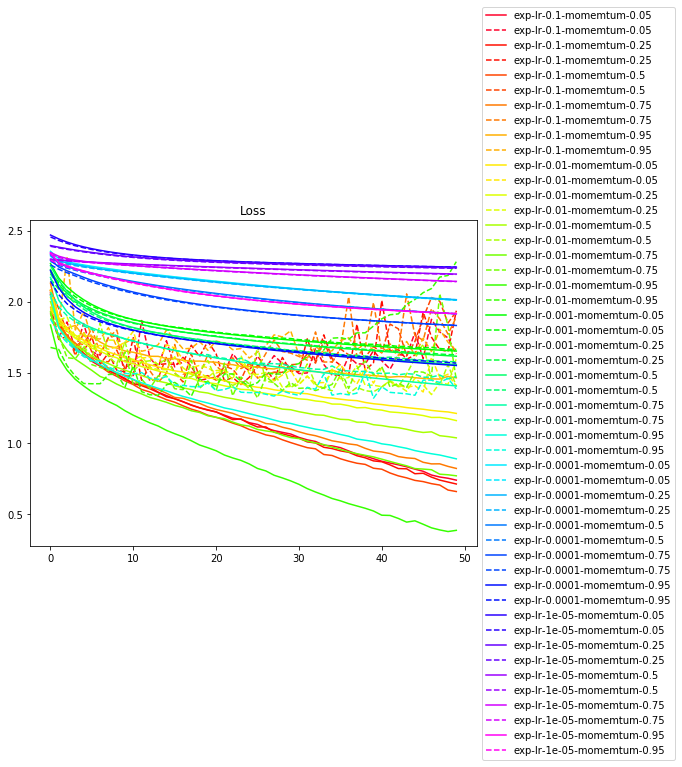

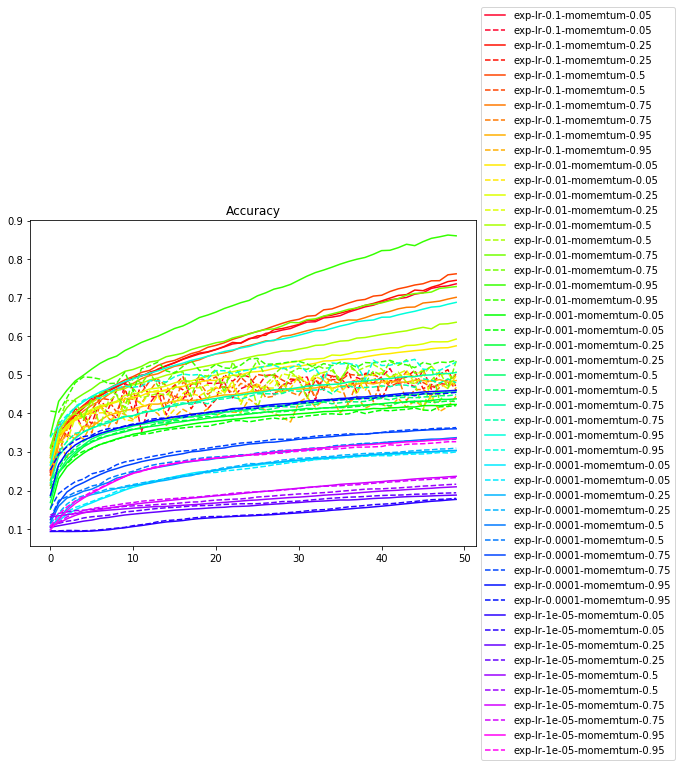

In [90]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()